<a href="https://colab.research.google.com/github/houdaM97/kaggle-projects/blob/master/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 45kB/s 


In [0]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

TensorFlow 2.x selected.
Found GPU at: /device:GPU:0


In [0]:
!pip install transformers

     |████████████████████████████████| 481kB 2.8MB/s 
     |████████████████████████████████| 3.1MB 43.2MB/s 
     |████████████████████████████████| 870kB 38.3MB/s 
     |████████████████████████████████| 1.0MB 37.9MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.38-cp36-none-any.whl size=884628 sha256=a8a557c9365d63b8841906af94f31436a222d401a75ce9ecbb65e4958e9dc679
  Stored in directory: /root/.cache/pip/wheels/6d/ec/1a/21b8912e35e02741306f35f66c785f3afe94de754a0eaf1422
Successfully built sacremoses


In [0]:
from transformers import BertTokenizer, BertConfig
from transformers import TFBertForSequenceClassification
import pandas as pd
import numpy as np
import seaborn as sb

In [0]:
df = pd.read_csv("train.tsv", sep='\t', engine='python')

In [0]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [0]:
config = BertConfig.from_pretrained("bert-base-uncased", num_labels=5)
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', config=config)

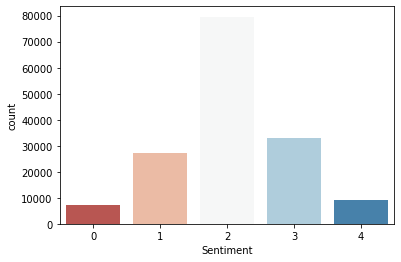

In [0]:
sb.countplot(x='Sentiment', data = df, palette='RdBu')

In [0]:
max_seq_length = 128

In [0]:
def convert_bool_to_int(x):
  if x == False :
    return 1
  else :
    return 0

In [0]:
def convert_examples_to_features(example):
  inputs = tokenizer.encode_plus(example, max_length=max_seq_length, pad_to_max_length=True, add_special_tokens=True)
  iids = inputs['input_ids']
  
  """if len(iids) > (max_seq_length - 2) :
    iids = iids[0:(max_seq_length - 2)]
    token_type_ids = inputs['token_type_ids'][0:(max_seq_length - 2)]
  
  if len(iids) < (max_seq_length - 2) :
    iids.append(0)
    token_type_ids.append(0)"""

  input_ids = tf.constant([iids])
  attention_mask = tf.constant([inputs['attention_mask']])
  token_type_ids = tf.constant([inputs['token_type_ids']])
  #input_mask = (input_ids == 0)
  #input_mask = tf.map_fn(convert_bool_to_int, input_mask[0], dtype = tf.int32)
  #segment_tensors = tf.constant([token_type_ids])
  #return {'input_ids': input_ids, 'input_mask': input_mask, 'segment_tensors': segment_tensors}
  return {'input_ids': input_ids, 'attention_mask': attention_mask, 'token_type_ids': token_type_ids}

In [0]:
df['Features'] = df['Phrase'].apply(convert_examples_to_features)

In [0]:
df['Features'].to_numpy()

array([{'input_ids': <tf.Tensor: shape=(1, 128), dtype=int32, numpy=
array([[  101,  1037,  2186,  1997,  9686, 17695, 18673, 14313,  1996,
        15262,  3351,  2008,  2054,  2003,  2204,  2005,  1996, 13020,
         2003,  2036,  2204,  2005,  1996, 25957,  4063,  1010,  2070,
         1997,  2029,  5681,  2572, 25581,  2021,  3904,  1997,  2029,
         8310,  2000,  2172,  1997,  1037,  2466,  1012,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
        

In [0]:
next(df.iterrows())[1]['Features']

{'attention_mask': <tf.Tensor: shape=(1, 128), dtype=int32, numpy=
 array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
       dtype=int32)>,
 'input_ids': <tf.Tensor: shape=(1, 128), dtype=int32, numpy=
 array([[  101,  1037,  2186,  1997,  9686, 17695, 18673, 14313,  1996,
         15262,  3351,  2008,  2054,  2003,  2204,  2005,  1996, 13020,
          2003,  2036,  2204,  2005,  1996, 25957,  4063,  1010,  2070,
          1997,  2029,  5681,  2572, 25581,  2021,  3904,  1997,  2029,
          8310,  2000,  2172,  1997,  1037,  2466,  1012,   102,     0,
             0,     0,     0,     0,     0,     0

In [0]:
print(df['Sentiment'].loc[0])


1


In [0]:
def get_shape_list(tensor):
  shape = tensor.shape.as_list()

  non_static_indexes = []
  for (index, dim) in enumerate(shape):
    if dim is None:
      non_static_indexes.append(index)

  if not non_static_indexes:
    return shape

  dyn_shape = tf.shape(tensor)
  for index in non_static_indexes:
    shape[index] = dyn_shape[index]
  return shape

In [0]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
with tf.device('/device:GPU:0'):
  optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0)
  epochs = 3
  batch_size = 1
  for epoch in range(epochs):
    for i, batch in df.iterrows():
      with tf.GradientTape() as tape:
        input_ids = batch['Features']['input_ids']
        attention_mask = batch['Features']['attention_mask']
        token_type_ids = batch['Features']['token_type_ids']
        label_id = df['Sentiment'].loc[i]
        outputs = model(input_ids, attention_mask= attention_mask, token_type_ids= token_type_ids, training= True)
        logits = outputs[0]
        logits_shape = get_shape_list(logits)[1]
        log_probs = tf.nn.log_softmax(logits, axis=-1)
        labels = tf.one_hot(label_id, on_value=1.0, off_value=0.0, depth=logits_shape, dtype=tf.float32)
        loss = -tf.reduce_mean(tf.reduce_sum(log_probs * labels, axis=-1))
        grads = tape.gradient(loss, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
      if i % 200 == 0:
        print('Training loss (for one batch) at step %s: %s' % (i, float(loss)))
        print('Seen so far: %s samples' % ((i + 1) * batch_size))


Training loss (for one batch) at step 0: 1.9212234020233154
Seen so far: 1 samples
Training loss (for one batch) at step 200: 1.7568427324295044
Seen so far: 201 samples
Training loss (for one batch) at step 400: 1.957686424255371
Seen so far: 401 samples
Training loss (for one batch) at step 600: 0.13277815282344818
Seen so far: 601 samples
Training loss (for one batch) at step 800: 2.304100751876831
Seen so far: 801 samples
Training loss (for one batch) at step 1000: 1.4647380113601685
Seen so far: 1001 samples
Training loss (for one batch) at step 1200: 0.5688464641571045
Seen so far: 1201 samples
Training loss (for one batch) at step 1400: 0.4697492718696594
Seen so far: 1401 samples
Training loss (for one batch) at step 1600: 0.5261104106903076
Seen so far: 1601 samples
Training loss (for one batch) at step 1800: 3.2130796909332275
Seen so far: 1801 samples
Training loss (for one batch) at step 2000: 0.3288925886154175
Seen so far: 2001 samples
Training loss (for one batch) at ste

In [1]:
model.save_pretrained('./save_model/')

NameError: ignored

In [0]:
df_test = pd.read_csv("test.tsv", sep='\t', engine='python')

In [0]:
df_test['Features'] = df_test['Phrase'].apply(convert_examples_to_features)

In [0]:
labels = []
for i, batch in df_test.iterrows():
  input_ids = batch['Features']['input_ids']
  attention_mask = batch['Features']['attention_mask']
  token_type_ids = batch['Features']['token_type_ids']
  outputs = model(input_ids, attention_mask= attention_mask, token_type_ids= token_type_ids, training= True)
  logits = outputs[0]
  label_id = tf.argmax(logits.numpy()[0]).numpy()
  labels.append(label_id)